In [5]:
# importing libraries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plot      
from statistics import mean
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [6]:
# Getting the data from the file
raw_data = pd.read_csv('iris.csv',header=None)
x = np.array(raw_data.iloc[:,:-1])
y = np.ndarray(shape=(len(raw_data.iloc[:,-1])),dtype=np.integer)

# Mapping the class and feature names to some integers
cls = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
features = {0:'sepal length', 1:'sepal width',2:'petal length',3:'petal width'}

In [7]:
# Replacing class names with mapped integers
for i in range(len(raw_data.iloc[:,-1])):
    y[i]=cls[raw_data.iloc[i,-1]]

# Normalizing/scaling the features
x = preprocessing.normalize(x,norm='l2')

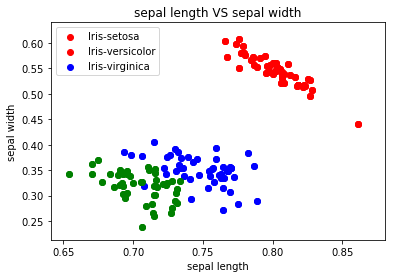

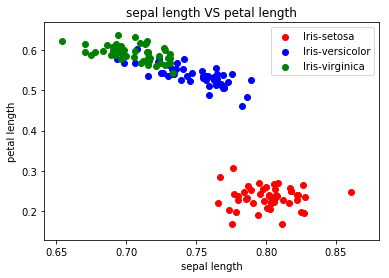

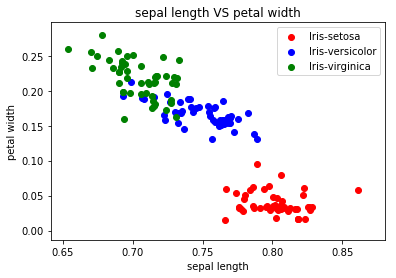

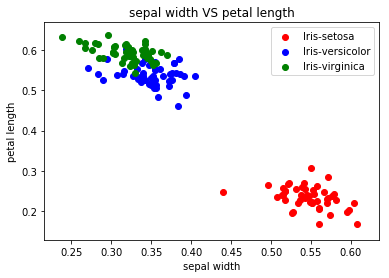

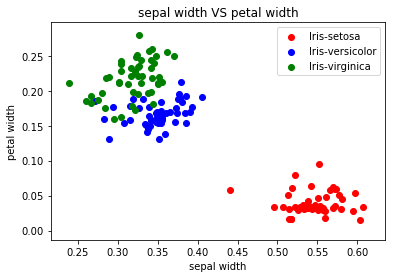

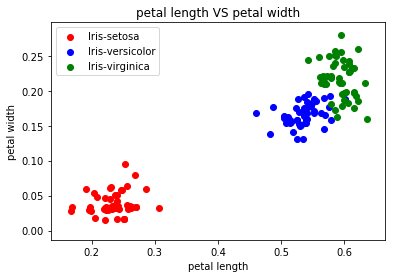

In [9]:
# plotting and observing how the data is classified for different feature vs feature
for i in range(4):
    for j in range(i+1,4):
        plot.scatter(x[:50,i],x[:50,j],c='r')
        plot.scatter(x[50:100,i],x[50:100,j],c='b')
        plot.scatter(x[100:150,i],x[100:150,j],c='g')
        plot.legend(["Iris-setosa", "Iris-versicolor","Iris-virginica"]) 
        plot.title(features[i]+" VS "+features[j])
        plot.xlabel(features[i])
        plot.ylabel(features[j])
        plot.show()

In [10]:
# To store train and test sets
x_train = np.ndarray(shape=(120,4),dtype=np.float64)
x_test = np.ndarray(shape=(30,4),dtype=np.float64)
y_train = np.ndarray(shape=(120),dtype=np.integer)
y_test = np.ndarray(shape=(30),dtype=np.integer)

# For splitting the train and test set manually

j=k=0
for i in range(len(x[:,0])):
    if i%50 < 40:
        x_train[j] = x[i]
        y_train[j] = y[i]
        j+=1
    else:
        x_test[k] = x[i]
        y_test[k] = y[i]
        k+=1

        
# For randomizing and shuffiling and splitting thr train and test set
# tain,x_test, y_train, y_test = train_test_split(x,y,stratify = y,test_size=0.2)

In [11]:
def euclidean_dist(x,y):
    return np.sqrt(np.dot(x-y,x-y))

In [12]:
def mahalanobis_dist(x,y,cov):
    inv_cov = np.linalg.inv(cov)
    return (x-y) @ inv_cov @ (x-y).T

In [13]:
def city_block_dist(x,y):
    return np.sum(abs(i-j) for i,j in zip(x,y))

In [14]:
def chebyshev_dist(x,y):
    return np.max([abs(i-j) for i,j in zip(x,y)])

In [15]:
def correlation_dist(x,y):
    return 1-(((x-np.mean(x)) @ (y-np.mean(y)))/(np.linalg.norm(x-np.mean(x))*np.linalg.norm(y-np.mean(y))))

In [16]:
def cosine_dist(x,y):
    return 1-(x @ y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [17]:
def bray_curtis_dist(x,y):
    return np.sum(abs(i-j) for i,j in zip(x,y))/np.sum(abs(i+j) for i,j in zip(x,y))

In [18]:
def canberra_dist(x,y):
    return np.sum([abs(i-j)/(abs(i)+abs(j)) for i,j in zip(x,y)])

In [19]:
# Training
# Finding the average of different class data
avg = np.ndarray(shape=(len(cls),4),dtype=np.float64)
for i in range(len(cls)):
    temp=[]
    for j in range(len(y_train)):
        if y_train[j]==i:
            temp.append(x_train[j])
    avg[i] = np.mean(temp,axis=0)

# covariance matrix of features for Mahalanobis distance
cov = np.cov(x_test.T)

# To store the count of misclassification for different distance classifier
wrng={
    'euclidean_dist':0,
    'mahalanobis_dist':0,
    'city_block_dist':0,
    'chebyshev_dist':0,
    'correlation_dist':0,
    'cosine_dist':0,
    'bray_curtis_dist':0,
    'canberra_dist':0
     }

# To store error sum for different distance classifier
total_error={
    'euclidean_dist':0,
    'mahalanobis_dist':0,
    'city_block_dist':0,
    'chebyshev_dist':0,
    'correlation_dist':0,
    'cosine_dist':0,
    'bray_curtis_dist':0,
    'canberra_dist':0
     }

# To store the sum of square errors for different distance classifier
total_square_error={
    'euclidean_dist':0,
    'mahalanobis_dist':0,
    'city_block_dist':0,
    'chebyshev_dist':0,
    'correlation_dist':0,
    'cosine_dist':0,
    'bray_curtis_dist':0,
    'canberra_dist':0
     }

# Testing for different distance classifiers
for i in range(len(x_test[:,0])):
    
    
    total_error['euclidean_dist']+=np.min([euclidean_dist(x_test[i],j) for j in avg])              # calculating and storing errors
    total_square_error['euclidean_dist']+=np.min([euclidean_dist(x_test[i],j) for j in avg])**2    # squared error
    index = np.argmin([euclidean_dist(x_test[i],j) for j in avg])                                  # finding the min dist. class
    if index != y_test[i]:                                                      # checking the correctness of prediction
        wrng['euclidean_dist']+=1                                               # incrementing miclassification count on wrong prediction

    total_error['mahalanobis_dist']+=np.min([mahalanobis_dist(x_test[i],j,cov) for j in avg])
    total_square_error['mahalanobis_dist']+=np.min([mahalanobis_dist(x_test[i],j,cov) for j in avg])**2
    index = np.argmin([mahalanobis_dist(x_test[i],j,cov) for j in avg])
    if index != y_test[i]:
        wrng['mahalanobis_dist']+=1

    total_error['city_block_dist']+=np.min([city_block_dist(x_test[i],j) for j in avg])
    total_square_error['city_block_dist']+=np.min([city_block_dist(x_test[i],j) for j in avg])**2
    index = np.argmin([city_block_dist(x_test[i],j) for j in avg])
    if index != y_test[i]:
        wrng['city_block_dist']+=1
        
    total_error['chebyshev_dist']+=np.min([chebyshev_dist(x_test[i],j) for j in avg])
    total_square_error['chebyshev_dist']+=np.min([chebyshev_dist(x_test[i],j) for j in avg])**2
    index = np.argmin([chebyshev_dist(x_test[i],j) for j in avg])
    if index != y_test[i]:
        wrng['chebyshev_dist']+=1
        
    total_error['correlation_dist']+=np.min([correlation_dist(x_test[i],j) for j in avg])
    total_square_error['correlation_dist']+=np.min([correlation_dist(x_test[i],j) for j in avg])**2
    index = np.argmin([correlation_dist(x_test[i],j) for j in avg])
    if index != y_test[i]:
        wrng['correlation_dist']+=1
    
    total_error['bray_curtis_dist']+=np.min([bray_curtis_dist(x_test[i],j) for j in avg])
    total_square_error['bray_curtis_dist']+=np.min([bray_curtis_dist(x_test[i],j) for j in avg])**2
    index = np.argmin([bray_curtis_dist(x_test[i],j) for j in avg])
    if index != y_test[i]:
        wrng['bray_curtis_dist']+=1
        
    total_error['canberra_dist']+=np.min([canberra_dist(x_test[i],j) for j in avg])
    total_square_error['canberra_dist']+=np.min([canberra_dist(x_test[i],j) for j in avg])**2
    index = np.argmin([canberra_dist(x_test[i],j) for j in avg])
    if index != y_test[i]:
        wrng['canberra_dist']+=1


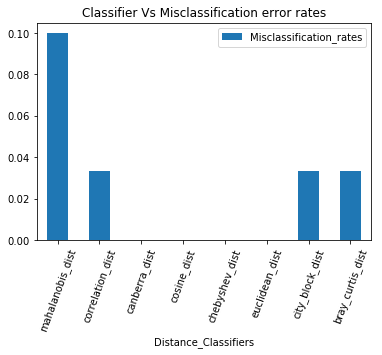

In [20]:
# Plotting Classifier Vs Misclassification error rates

misclassification_rates = list([wrng[i]/30 for i in wrng.keys()])
distance_classifiers = list([i for i in wrng.keys()])

data = {"Distance_Classifiers":distance_classifiers,
        "Misclassification_rates":misclassification_rates}

# Data loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data)
dataFrame.plot.bar(x="Distance_Classifiers", y="Misclassification_rates", rot=70, title="Classifier Vs Misclassification error rates")
plot.show(block=True)

# From the plots, it is clear that for every random train and test set:
# cosine distance classifier gives the least misclassification rate
# and the misclassification rates are always very less

In [23]:
# Calculating the different mean errors VS Distance classifiers

mean_errors = list([total_error[i]/30 for i in total_error.keys()])
mean_squared_errors = list([total_square_error[i]/30 for i in total_error.keys()])
mean_absolute_errors = list([abs(total_error[i])/30 for i in total_error.keys()])

print("Mean errors: ",mean_errors,"\n")
print("Mean squared errors: ",mean_squared_errors,"\n")
print("Mean absolute errors: ",mean_absolute_errors)

Mean errors:  [2.9969193106048229, 0.0036325991312717298, 0.13425068904338075, 0.0, 0.033346602166227979, 0.042162689079821673, 0.071425388989835886, 0.020421837099001243] 

Mean squared errors:  [19.245561787952344, 4.234882126369552e-05, 0.030116634460811819, 0.0, 0.0015643430490159733, 0.0023852340655285942, 0.0067504434294365784, 0.00056258305669051086] 

Mean absolute errors:  [2.9969193106048229, 0.0036325991312717298, 0.13425068904338075, 0.0, 0.033346602166227979, 0.042162689079821673, 0.071425388989835886, 0.020421837099001243]


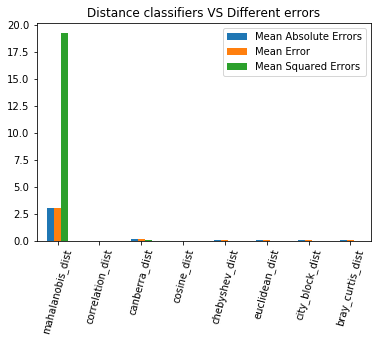

In [22]:
# Plotting the Distance classifiers vs different mean errors

data={
    'Mean Error':mean_errors,
    'Mean Squared Errors':mean_squared_errors,
    'Mean Absolute Errors':mean_absolute_errors
}

dataFrame = pd.DataFrame(data = data, index = distance_classifiers)
dataFrame.plot.bar(rot=75,title="Distance classifiers VS Different errors")
plot.show()